In [332]:
import pandas as pd
import numpy as np

In [333]:
df= pd.read_csv('C:/Users/91637/OneDrive/Desktop/ML Campus_X/10 Naive Bayes/spam.csv', encoding='latin1')



In [334]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4983,spam,goldviking (29/M) is inviting you to be his fr...,NaN,NaN,NaN
4238,ham,"Sez, hows u & de arab boy? Hope u r all good g...",NaN,NaN,NaN
5197,ham,I like cheap! But iÛ÷m happy to splash out on...,NaN,NaN,NaN
251,ham,"Wen ur lovable bcums angry wid u, dnt take it ...",NaN,NaN,NaN
279,ham,All done? All handed in? Celebrations in full ...,NaN,NaN,NaN


In [335]:
df.shape

(5572, 5)

1 Data Cleaning

2 EDA

3 Text Preprossing

4 Model Building

5 Model Evaluation

6 Improvement

7 Website 

8 Deploy

Data Cleaning

In [336]:
df.shape

(5572, 5)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [338]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [339]:
df.sample(5)

,v1,v2
101,ham,I'm still looking for a car to buy. And have n...
4593,ham,I had a good time too. Its nice to do somethin...
1855,ham,K.:)you are the only girl waiting in reception...
1731,ham,Lol. Well quality aint bad at all so i aint co...
3618,spam,8007 25p 4 Alfie Moon's Children in Need song ...


In [340]:
df.rename(columns={'v1':'target','v2':'test'},inplace=True)

In [341]:
df.head()

,target,test
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [342]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [343]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
lebel=LabelEncoder()

In [344]:
df['target']=lebel.fit_transform(df['target'])

In [345]:
df.head()

,target,test
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [346]:
df.isnull().sum()

target    0
test      0
dtype: int64

In [347]:
df.duplicated().sum()

np.int64(403)

In [348]:
df=df.drop_duplicates(keep='first')

In [349]:
df.duplicated().sum()

np.int64(0)

EDA

In [350]:
df[df['target']==1].count()[0]

C:\Users\91637\AppData\Local\Temp\ipykernel_23384\3278067882.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[df['target']==1].count()[0]


np.int64(653)

In [351]:
df[df['target']==0].count()[0]

C:\Users\91637\AppData\Local\Temp\ipykernel_23384\496023860.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[df['target']==0].count()[0]


np.int64(4516)

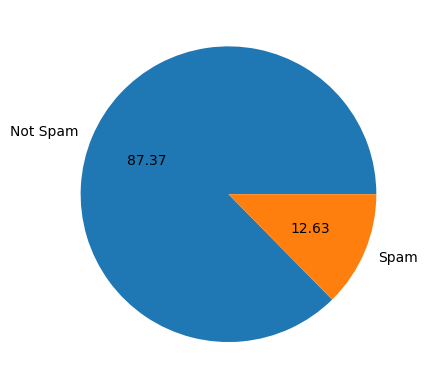

In [352]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Not Spam','Spam'],autopct='%0.2f')
plt.show()

In [353]:
df['Number Of Charecter']=df['test'].apply(len)

In [354]:
import nltk


In [355]:
df['num_words'] = df['test'].apply(lambda x:len(nltk.word_tokenize(x)))

In [356]:
df['num_sentences'] = df['test'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [357]:
df.head()

,target,test,Number Of Charecter,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [358]:
df[['Number Of Charecter','num_words','num_sentences']].describe()

,Number Of Charecter,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [359]:
df[df['target']==0][['Number Of Charecter','num_words','num_sentences']].describe()

,Number Of Charecter,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [360]:
df[df['target']==0][['Number Of Charecter','num_words','num_sentences']].describe()

,Number Of Charecter,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [361]:
import seaborn as sns

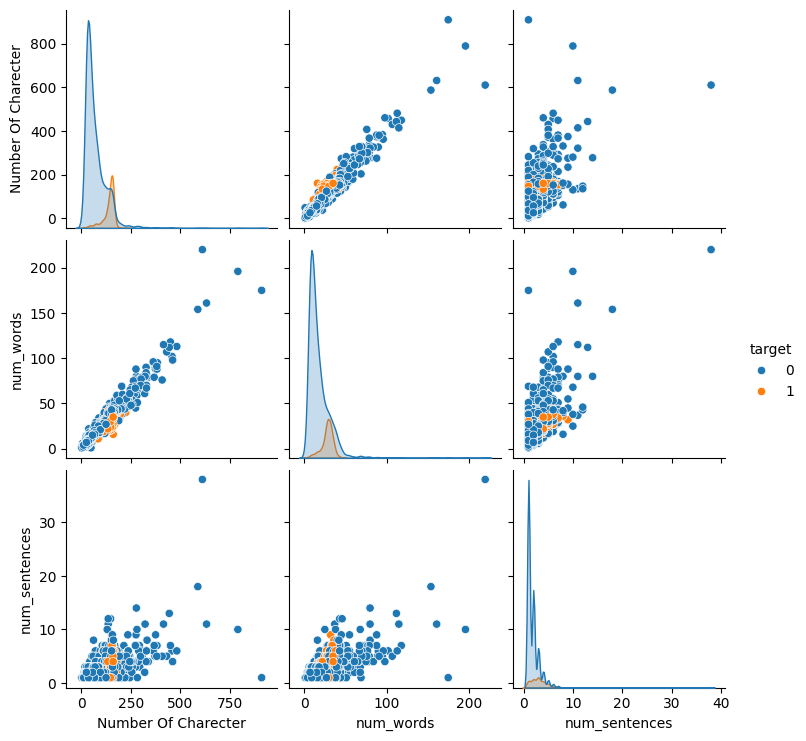

In [362]:
sns.pairplot(df,hue='target')

In [363]:
df.head(1)

,target,test,Number Of Charecter,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [364]:
df[['target','Number Of Charecter','num_words','num_sentences']].corr()

,target,Number Of Charecter,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
Number Of Charecter,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

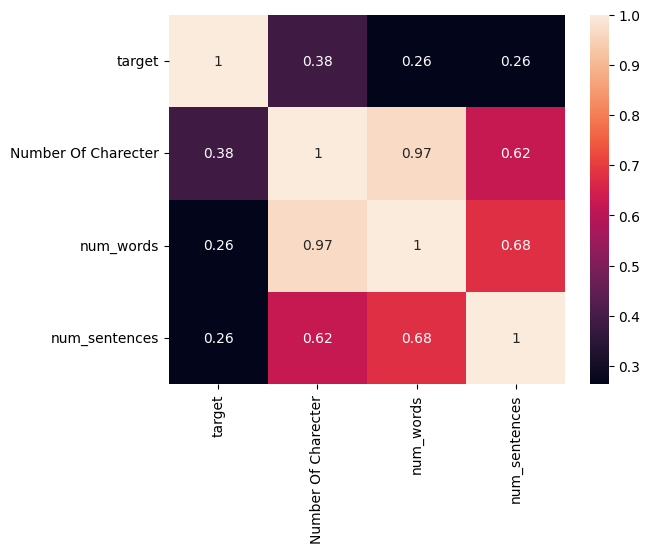

In [365]:
sns.heatmap(df[['target','Number Of Charecter','num_words','num_sentences']].corr(),annot=True)

3. Data Preprocessing

• Lower case

• Tokenization

• Removing special characters

• Removing stop words and punctuation

• Stemming

In [366]:
df.head()

,target,test,Number Of Charecter,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [367]:
df['test'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [368]:
def smaller(text):
    text=text.lower()
    return text

In [369]:
df['new_test']=df['test'].apply(smaller)

In [370]:
from nltk.tokenize import word_tokenize

def word(text):
    text=word_tokenize(text)
    return text

In [371]:
df['new_test']=df['new_test'].apply(word)

In [372]:
def special_charter(test):
    y=[]
    for i in test:
        if i.isalnum():
            y.append(i)
    return y


In [373]:
df['new_test']=df['new_test'].apply(special_charter)

In [374]:
from nltk.corpus import stopwords


In [375]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [376]:
def remove_stpword_and_puctuation(text):
    l=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(i)
    return l


In [377]:
df['new_test']=df['new_test'].apply(remove_stpword_and_puctuation)

In [378]:
# stemming(df['new_test'][2])

In [379]:
from nltk.stem import WordNetLemmatizer
lemotizer=WordNetLemmatizer()


def stemming(text):
    b=[]
    for i in text:
        b.append(lemotizer.lemmatize(i,pos='v'))
    return b

In [380]:
stemming(df['new_test'][2])

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '08452810075over18']

In [381]:
from nltk.stem import SnowballStemmer
snowball=SnowballStemmer('english')
def snowball_stemming(text):
    b=[]
    for i in text:
        b.append(snowball.stem(i))
    return b

In [382]:
df['new_test'][1000]

['heard', 'abt', 'tat']

In [383]:
df['new_test']=df['new_test'].apply(snowball_stemming).apply(stemming)

In [384]:
def convert_str(text):
    text=" ".join(text)
    return text

In [385]:
df['new_test']=df['new_test'].apply(convert_str)

In [386]:
df.head()

,target,test,Number Of Charecter,num_words,num_sentences,new_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [387]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [388]:
spam_wc = wc.generate(df[df['target'] == 1]['new_test'].str.cat(sep=" "))

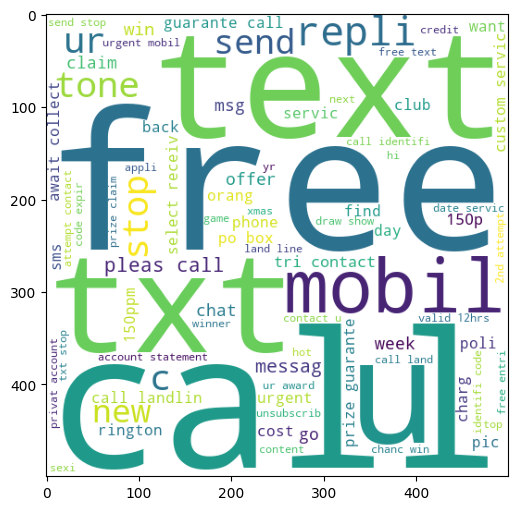

In [389]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [390]:
ham_wc = wc.generate(df[df['target'] == 0]['new_test'].str.cat(sep=" "))

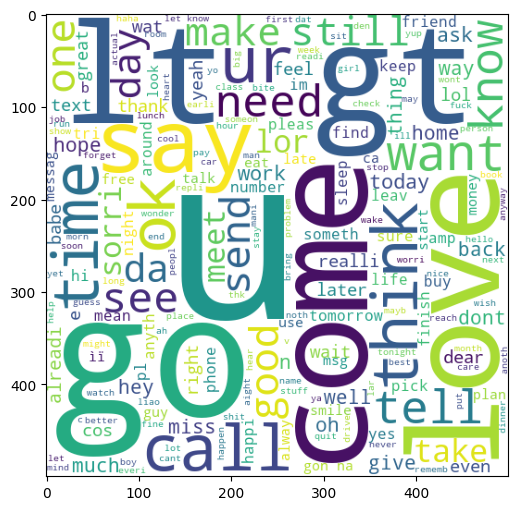

In [391]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [392]:
df.head()

,target,test,Number Of Charecter,num_words,num_sentences,new_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [408]:
spam_corpes=[]
for i in df[df['target']==1]['new_test'].tolist():
    for j in i.split():
        spam_corpes.append(j)

In [409]:
len(spam_corpes)

9939

<Axes: xlabel='Element'>

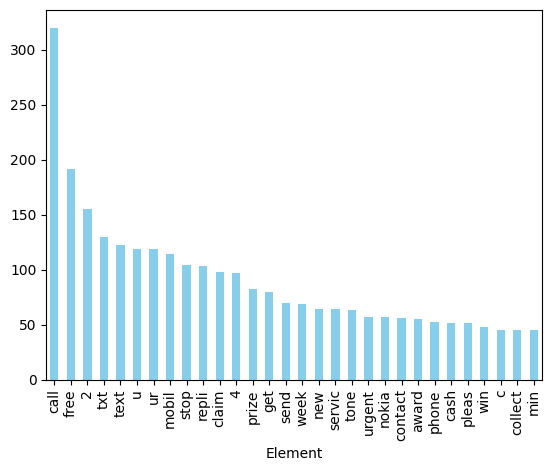

In [439]:
from collections import Counter
pd.DataFrame(Counter(spam_corpes).most_common(30),columns=['Element', 'Count']).plot(kind='bar', x='Element', y='Count', legend=False, color='skyblue')

In [411]:
ham_corpes=[]
for i in df[df['target']==0]['new_test'].tolist():
    for j in i.split():
        ham_corpes.append(j)

In [412]:
len(ham_corpes)

35404

In [431]:
from collections import Counter
most_common =pd.DataFrame(Counter(ham_corpes).most_common(30),columns=['Element', 'Count'])


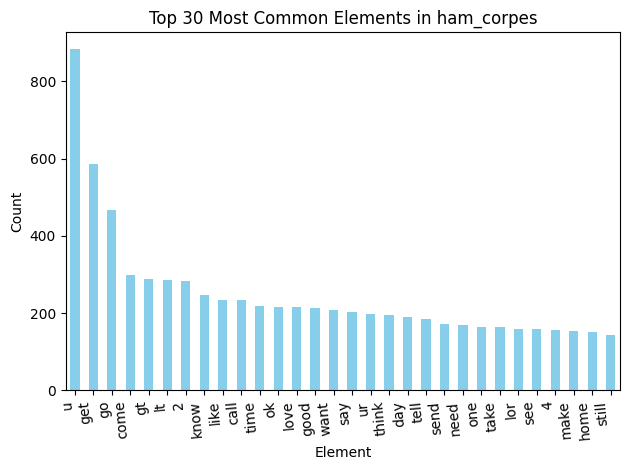

In [436]:
# Plot the data
most_common.plot(kind='bar', x='Element', y='Count', legend=False, color='skyblue')

# Add labels and title
plt.title('Top 30 Most Common Elements in ham_corpes')
plt.xlabel('Element')
plt.ylabel('Count')
plt.xticks(rotation=95, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [441]:
# Text Vectorization
# using Bag of Words
df.head()

,target,test,Number Of Charecter,num_words,num_sentences,new_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [443]:
df.shape

(5169, 6)

In [492]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2500)

In [493]:
X = tfidf.fit_transform(df['new_test']).toarray()


In [494]:
y=df['target'].values

In [495]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [496]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [497]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gab=GaussianNB()
mul=MultinomialNB()
ber=BernoulliNB()

In [489]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score

In [498]:
gab.fit(X_train,y_train)
y_pred1 = gab.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8646034816247582
[[780 116]
 [ 24 114]]
0.4956521739130435


In [499]:
mul.fit(X_train,y_train)
y_pred1 = mul.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [500]:
ber.fit(X_train,y_train)
y_pred1 = ber.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9854932301740812
[[895   1]
 [ 14 124]]
0.992


In [502]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mul,open('model.pkl','wb'))